pair_coeff	1 1 0   0   0   0   0   0   0   -278929.1056622137  0   0   0   0   0   8775200057.609077  0   



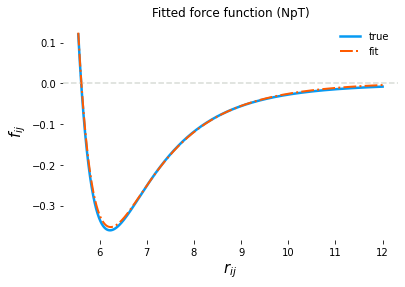

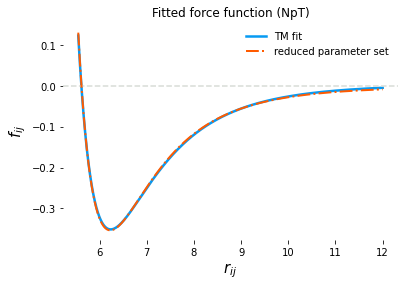

In [7]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 0.75 / x * (2 * 5 ** 12 * x ** (-12) - 5 ** 6 * x ** (-6))

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "/home/markjenei//polymerisation-coarse-graining/lj_test/one_component_files/lj_trajectory_match_npt.out"
params = range(-1, -15, -2)
simulation_timestep = 0.5

# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': 5/100}
steps = 3
timesteps_in_fit = 110

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit)


x = np.linspace(5.55, 12, 10000)
proc.prepare_training_data()
proc.fit()
y_fit = proc.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y)
proc.best_subset((-7, -13), x, print_coeffs=True)

## Heavy

pair_coeff	1 1 0   0   0   0   0   0   0   -4316864.6528080935  0   0   0   0   0   1541606039552.5127  0   



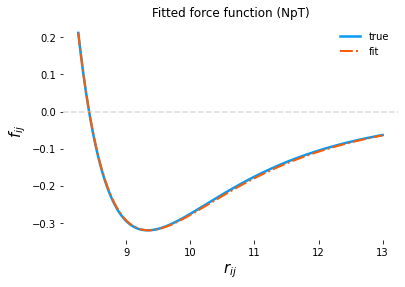

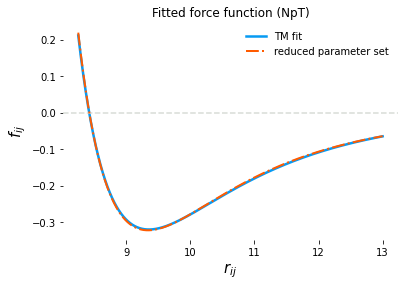

In [14]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 1.0 / x * (2 * (7.5/x) ** 12 - (7.5/x) ** 6)

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "/home/markjenei/polymerisation-coarse-graining/lj_test/one_component_files/lj_trajectory_match_heavy_npt.out"
params = range(-1, -15, -2)
simulation_timestep = 0.5

# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': 6/200}
steps = 6
timesteps_in_fit = 300

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=15,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit, op_sys='W')

x = np.linspace(8.25, 13, 10000)
proc.prepare_training_data()
proc.fit()
y_fit = proc.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y)
proc.best_subset((-7, -13), x, print_coeffs=True)


# Molecule

In [ ]:
import numpy as np
from tm_develop import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_trajectory_match.out"
params = range(0, -15, -2)
simulation_timestep = 0.5


for steps in []:
    for timesteps_in_fit in range(100, 310, 10):
        for cutoff in [26, 27, 28, 29, 30]:
            proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=cutoff,
                                  basis=basis_function, basis_parameters=params,
                                  every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                                  system_style='molecular', op_sys="W")

            proc.prepare_training_data()
            proc.fit()

            x = np.linspace(5.25, 50, 1000)
            y_fit = proc.predict(x)
            plot_1component(x, y_fit, thermostat='NpT', output_path=f"D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/hardener/tm_npt_{steps}_{timesteps_in_fit}_{cutoff}.png")

In [ ]:
import numpy as np
from tm_develop import TrajectoryMatching
from misc import plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_trajectory_match.out"
params = range(0, -15, -2)
simulation_timestep = 0.5

# These parameters affect the accuracy of the fit. 'steps' = {'NVE': , 'NpT': 3/400}
steps = 3
timesteps_in_fit = 190
cutoff = 26

proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=cutoff,
                      basis=basis_function, basis_parameters=params,
                      every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                      system_style='molecular', op_sys='W')

proc.prepare_training_data()
proc.fit()

reduce_parameters = True
x = np.linspace(5.25, 50, 1000)
if reduce_parameters:
    proc.best_subset([3,4], x, center_y=True)
else:
    y_fit = proc.predict(x)
    plot_1component(x, y_fit, thermostat='NpT', output_path=f"D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/hardener/tm_npt_{steps}_{timesteps_in_fit}_{cutoff}.png")



In [ ]:
import numpy as np
from tm_develop import TrajectoryMatching

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

outfile = "D:/CAM/PhD_Year3/ML_CG/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_trajectory_match.out"
params = range(0, -15, -2)
simulation_timestep = 0.5

inputs = [[3, 190, 26], [3, 230, 27], [3, 240, 29], [3, 250, 30],
          [3, 260, 28], [3, 270, 30], [3, 280, 30], [3, 290, 30],
          [4, 160, 26], [4, 180, 27], [4, 200, 30], [5, 110, 27],
          [5, 120, 30], [5, 160, 30], [6, 120, 26], [6, 220, 30]]

for input in inputs:
    print(input)
    steps = input[0]
    timesteps_in_fit = input[1]
    cutoff = input[2]
    proc = TrajectoryMatching(outfile_path=outfile, simulation_timestep=simulation_timestep, cutoff=cutoff,
                          basis=basis_function, basis_parameters=params,
                          every_n_from_output=steps, timesteps_in_fit=timesteps_in_fit,
                          system_style='molecular', op_sys="W")

    proc.prepare_training_data()
    proc.fit()

    x = np.linspace(5.2, 50, 1000)
    proc.best_subset([3,4], x, center_y=True)
